# 1- Preprocessing

## Open the file

In [173]:
import pandas as pd 
df_original = pd.read_csv("../hw_data.csv")
df_original = df_original.drop(df_original.columns[0], axis=1)
df_original


,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,1
1,73,Female,College,54465.0,NaN,0.0,E,5,1
2,68,Male,High School,37427.0,married,0.0,D,1,1
3,61,Female,College,52210.0,widowed,0.0,G,8,1
4,34,Female,College,59325.0,separated,1.0,A,5,0
...,...,...,...,...,...,...,...,...,...
105,85,Female,University,39063.0,divorced,NaN,F,8,0
106,500,Female,NaN,31158.0,NaN,NaN,NaN,9,0
107,39,Female,College,55750.0,married,1.0,F,5,1
108,80,Female,High School,32142.0,separated,NaN,C,7,1


In [174]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)


## Examine file

In [175]:
df_original.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,110.0,NaN,NaN,NaN,98.0,143.9,0.0,30.2,54.0,84.0,500.0
Gender,110,2,Male,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,93,4,University,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,98.0,NaN,NaN,NaN,57527845.2,176829092.6,6740.0,31158.0,38702.5,50333.5,863305114.0
Marital Status,91,5,separated,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Status,75.0,NaN,NaN,NaN,0.6,0.5,0.0,0.0,1.0,1.0,1.0
Product Category,97,7,G,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Satisfaction Level,110.0,NaN,NaN,NaN,4.5,2.8,0.0,2.0,5.0,7.0,9.0
Debt Status,110.0,NaN,NaN,NaN,0.5,0.5,0.0,0.0,0.0,1.0,1.0


In [176]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 110 non-null    int64  
 1   Gender              110 non-null    object 
 2   Education Level     93 non-null     object 
 3   Income              98 non-null     float64
 4   Marital Status      91 non-null     object 
 5   Employment Status   75 non-null     float64
 6   Product Category    97 non-null     object 
 7   Satisfaction Level  110 non-null    int64  
 8   Debt Status         110 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 7.9+ KB


In [177]:
df_original.head(10)

,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,1
1,73,Female,College,54465.0,NaN,0.0,E,5,1
2,68,Male,High School,37427.0,married,0.0,D,1,1
3,61,Female,College,52210.0,widowed,0.0,G,8,1
4,34,Female,College,59325.0,separated,1.0,A,5,0
5,10,Female,Elementary,31918.0,separated,0.0,F,3,1
6,80,Male,University,36015.0,never married,NaN,A,5,0
7,25,Female,High School,23691.0,widowed,0.0,A,5,1
8,44,Male,Elementary,48126.0,widowed,NaN,F,0,0
9,89,Female,University,42850.0,never married,NaN,E,4,1


## Define missing values

In [178]:
filtered_df = df_original[df_original.isna().any(axis=1)]
filtered_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,66.0,NaN,NaN,NaN,78.7,111.6,1.0,35.2,56.0,80.0,500.0
Gender,66,2,Male,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,49,4,University,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,54.0,NaN,NaN,NaN,52748323.3,194436249.3,6740.0,26484.5,37058.5,45586.8,863305114.0
Marital Status,47,5,separated,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Status,31.0,NaN,NaN,NaN,0.5,0.5,0.0,0.0,1.0,1.0,1.0
Product Category,53,7,D,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Satisfaction Level,66.0,NaN,NaN,NaN,4.7,2.9,0.0,2.2,5.0,7.0,9.0
Debt Status,66.0,NaN,NaN,NaN,0.4,0.5,0.0,0.0,0.0,1.0,1.0


## Decide about missing values (fill or drop)

In [179]:
df = df_original.copy()

In [180]:
df.isna().sum()

Age                    0
Gender                 0
Education Level       17
Income                12
Marital Status        19
Employment Status     35
Product Category      13
Satisfaction Level     0
Debt Status            0
dtype: int64

In [181]:
df[df['Education Level'].isna()].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,17.0,NaN,NaN,NaN,133.4,177.2,1.0,48.0,58.0,93.0,500.0
Gender,17,2,Male,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,16.0,NaN,NaN,NaN,66124859.4,217842652.1,17592.0,26886.5,31461.5,46000.5,862386254.0
Marital Status,12,4,separated,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Status,9.0,NaN,NaN,NaN,0.8,0.4,0.0,1.0,1.0,1.0,1.0
Product Category,15,5,G,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Satisfaction Level,17.0,NaN,NaN,NaN,4.4,2.9,0.0,2.0,5.0,6.0,9.0
Debt Status,17.0,NaN,NaN,NaN,0.5,0.5,0.0,0.0,0.0,1.0,1.0


In [182]:
print(df['Education Level'].value_counts(dropna=False))
df['Education Level'].fillna("Unknown", inplace=True)
df['Education Level'].value_counts()

Education Level
University     30
High School    28
College        19
NaN            17
Elementary     16
Name: count, dtype: int64


/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_27615/3401602117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].fillna("Unknown", inplace=True)


Education Level
University     30
High School    28
College        19
Unknown        17
Elementary     16
Name: count, dtype: int64

In [183]:
df['Income'].describe()

count          98.0
mean     57527845.2
std     176829092.6
min          6740.0
25%         31158.0
50%         38702.5
75%         50333.5
max     863305114.0
Name: Income, dtype: float64

In [184]:
import  matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x3070ae450>,
 'caps': [<matplotlib.lines.Line2D at 0x3070ac450>,
 'boxes': [<matplotlib.lines.Line2D at 0x305d5f510>],
 'medians': [<matplotlib.lines.Line2D at 0x3070adbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3070e4850>],
 'means': []}

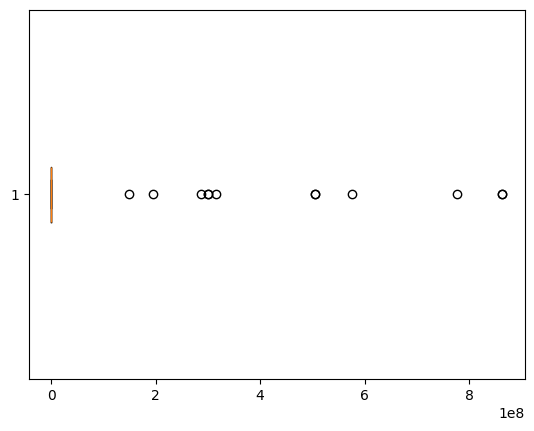

In [185]:
plt.boxplot(df['Income'].fillna(-1).astype(float),vert=False)


In [186]:
df['Income'].describe()

count          98.0
mean     57527845.2
std     176829092.6
min          6740.0
25%         31158.0
50%         38702.5
75%         50333.5
max     863305114.0
Name: Income, dtype: float64

In [187]:
import numpy as np

In [188]:
# We set outliers to NaN
index = df[df['Income']>70000].index
df[df['Income']>70000]


,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
14,70,Male,High School,863305114.0,NaN,0.0,D,4,1
23,48,Female,Unknown,195144049.0,separated,NaN,A,1,0
32,81,Female,College,314696218.0,never married,1.0,E,5,1
41,1,Male,Unknown,862386254.0,married,NaN,F,1,0
50,500,Male,University,575772080.0,married,0.0,D,5,0
59,90,Male,College,300245882.0,widowed,0.0,C,6,1
68,46,Male,University,777761952.0,married,1.0,NaN,8,0
77,99,Female,Elementary,286421460.0,widowed,1.0,G,2,0
86,31,Female,High School,505250420.0,separated,1.0,G,4,1
95,39,Male,High School,148112279.0,widowed,NaN,B,8,1


In [189]:
# We drop the outlier Income
df = df.drop(index)


In [190]:
df[df['Income']<10000]

,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
11,99,Female,High School,6740.0,separated,NaN,NaN,9,1
97,58,Male,Elementary,7010.0,widowed,1.0,NaN,5,0


In [191]:
df[df['Income'].isna()]

,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
15,58,Female,Unknown,NaN,NaN,NaN,G,5,0
22,9,Male,Elementary,NaN,separated,0.0,D,1,0
29,39,Male,High School,NaN,NaN,1.0,B,4,0
36,6,Male,Elementary,NaN,never married,1.0,E,7,1
43,40,Female,College,NaN,married,NaN,D,1,0
57,20,Male,University,NaN,separated,0.0,NaN,6,1
64,70,Male,University,NaN,married,1.0,NaN,7,1
71,58,Male,High School,NaN,widowed,0.0,NaN,9,0
78,30,Female,Elementary,NaN,divorced,0.0,E,3,0
85,94,Female,High School,NaN,separated,0.0,G,4,0


In [192]:
df['Age'].describe()

count    98.0
mean     98.5
std     146.0
min       0.0
25%      25.5
50%      54.0
75%      80.0
max     500.0
Name: Age, dtype: float64

In [193]:
age_outlier_index = df[(df['Age']<18) | (df['Age']>100)].index
df[(df['Age']<18) | (df['Age']>100)]

,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,500,Female,Unknown,31158.0,NaN,NaN,NaN,9,1
5,10,Female,Elementary,31918.0,separated,0.0,F,3,1
10,500,Female,College,31654.0,never married,1.0,G,7,0
13,7,Male,Elementary,39697.0,NaN,NaN,F,6,0
18,2,Female,Elementary,43806.0,married,0.0,C,3,1
20,500,Female,University,64165.0,separated,0.0,A,2,1
22,9,Male,Elementary,NaN,separated,0.0,D,1,0
26,5,Male,University,38342.0,NaN,0.0,G,2,0
30,500,Female,High School,18442.0,separated,1.0,A,3,0
36,6,Male,Elementary,NaN,never married,1.0,E,7,1


In [194]:
# drop those age outliers 
df = df.drop(age_outlier_index)

In [195]:
df.groupby('Marital Status',dropna=False)['Debt Status'].value_counts(dropna=False)
df['Marital Status'].fillna("Unknown",inplace=True)
df['Marital Status'].value_counts(dropna=False)

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_27615/1895582969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital Status'].fillna("Unknown",inplace=True)


Marital Status
married          16
separated        15
Unknown          12
widowed          12
divorced         12
never married     5
Name: count, dtype: int64

In [196]:
df['Product Category'].value_counts(dropna=False)

df['Product Category'].fillna("Unknown", inplace=True)

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_27615/1386874657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Category'].fillna("Unknown", inplace=True)


## Why did you fill missing values or if you have dropped, why did you do so? 

In [197]:
# Since there was no target on this data, I decided to convert the NaN values to Unknown in order to protect the data count for categorical variables

## Find outliers if there are

In [198]:
# Outliers has been detected and handled while assigning values to NaN, Income column

## Decide what will you do with outliers

In [199]:
# Outliers has been detected and handled while assigning values to NaN, Income column

## Find duplicates, how many are there? Decide what will you do about that?

In [200]:
duplicate_rows = df[df.duplicated()]
duplicate_rows


,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
100,39,Male,High School,NaN,Unknown,1.0,B,4,0


In [201]:
df = df.drop_duplicates()

## Explain why did you do that?

In [202]:
#Since the Income is very sepcific and other columns are the same, it is decided to drop the rows

# 2- Categorization

## Categorize satisfaction in 3 level and label them as 'Low', 'Moderate' and 'High'. Add a new column named 'Satisfaction Category' and store them there

#### ||| Low Satisfaction : (1-3) ||| Moderate Satisfaction : (4-7) ||| High Satisfaction : (8-10) |||

In [203]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Income', 'Marital Status',
       'Employment Status', 'Product Category', 'Satisfaction Level',
       'Debt Status'],
      dtype='object')

In [204]:
bins = [0, 3, 7, 10]
labels = ['Low', 'Moderate', 'High']

# Categorize satisfaction levels
df.loc[:,'Satisfaction Level'] = pd.cut(df['Satisfaction Level'], bins=bins, labels=labels, right=False)
df['Satisfaction Level'].value_counts()


/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_27615/1480713883.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Moderate', 'Low', 'High', 'Moderate', 'Moderate', ..., 'Moderate', 'Low', 'High', 'Moderate', 'High']
Length: 71
Categories (3, object): ['Low' < 'Moderate' < 'High']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Satisfaction Level'] = pd.cut(df['Satisfaction Level'], bins=bins, labels=labels, right=False)


Satisfaction Level
Moderate    32
Low         20
High        19
Name: count, dtype: int64

## Categorize income in 3 level and label them as 'Low', 'Moderate' and 'High'. Add a new column named 'Income Category' and store them there

In [205]:
df['Income'].describe()

count      62.0
mean    36896.9
std     12494.5
min      6740.0
25%     28737.8
50%     37342.5
75%     45571.0
max     59325.0
Name: Income, dtype: float64

In [206]:
interval = (df['Income'].max() - df['Income'].min())/3
bin = [df['Income'].min(),df['Income'].min()+interval, df['Income'].max()-interval,df['Income'].max() ]
label = ['Low', 'Moderate', 'High']
df.loc[:,'Income'] = pd.cut(df['Income'], bins=bin, labels=label, right=False)
df['Income'].value_counts()

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_27615/2963287079.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['High', 'Moderate', 'High', NaN, 'Moderate', ..., 'Moderate', 'High', 'Moderate', 'High', 'Moderate']
Length: 71
Categories (3, object): ['Low' < 'Moderate' < 'High']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Income'] = pd.cut(df['Income'], bins=bin, labels=label, right=False)


Income
Moderate    28
High        23
Low         10
Name: count, dtype: int64

# 3- Analyse

## Comparing using pivot tables

### Is there a relation between marital status and debt status?

In [207]:
df.head(2)

,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
1,73,Female,College,High,Unknown,0.0,E,Moderate,1
2,68,Male,High School,Moderate,married,0.0,D,Low,1


In [208]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Marital Status'], df['Debt Status'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square:", chi2)
print("p-value:", p)


Contingency Table:
Debt Status     0  1
Marital Status      
Unknown         6  5
divorced        5  7
married         8  8
never married   3  2
separated       8  7
widowed         9  3
Chi-Square: 3.0302229020979023
p-value: 0.6953261765028796


In [209]:
# We cannot say from this data that there is a relation between Marital Status and Debt

### Is there a relation between income category and debt status?

In [210]:
contingency_table = pd.crosstab(df['Income'], df['Debt Status'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square:", chi2)
print("p-value:", p)


Contingency Table:
Debt Status   0   1
Income             
Low           2   8
Moderate     16  12
High         13  10
Chi-Square: 4.547561610899618
p-value: 0.102922314297365


In [211]:
# From the data ,we can say there is a no relation between Income and Debt Status

### Is there a relation between education level and satisfaction category?

In [212]:
df.head(5)

,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
1,73,Female,College,High,Unknown,0.0,E,Moderate,1
2,68,Male,High School,Moderate,married,0.0,D,Low,1
3,61,Female,College,High,widowed,0.0,G,High,1
4,34,Female,College,NaN,separated,1.0,A,Moderate,0
6,80,Male,University,Moderate,never married,NaN,A,Moderate,0


In [213]:
contingency_table = pd.crosstab(df['Education Level'], df['Satisfaction Level'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square:", chi2)
print("p-value:", p)


Contingency Table:
Satisfaction Level  Low  Moderate  High
Education Level                        
College               3         6     3
Elementary            5         4     1
High School           6         6     7
University            3        11     6
Unknown               3         5     2
Chi-Square: 6.471313192520776
p-value: 0.594591323561575


In [214]:
# It seems they are independent of each other 

### Is there a relation between employment status and satisfaction category?

In [215]:
df['Employment Status'].value_counts()

Employment Status
1.0    26
0.0    20
Name: count, dtype: int64

In [216]:
contingency_table = pd.crosstab(df['Employment Status'], df['Satisfaction Level'])

print("Contingency Table:")
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square:", chi2)
print("p-value:", p)


Contingency Table:
Satisfaction Level  Low  Moderate  High
Employment Status                      
0.0                   4        10     6
1.0                   9        13     4
Chi-Square: 1.9652071005917167
p-value: 0.37433522844403266


In [77]:
# There is no relation between empoyment status and satisfaction category

# 4- General Conclusion

- Data has multiple anomalies and extreme outliers such as age of 500 or 0 
- Since the count of data is really small, it is not possible to fill NaN values with something meaningful

---

### Checklist

- [x]  start homework;
- [ ]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  an explanation of how the blanks are filled;
- [ ]  finding outliers;
- [ ]  handling outliers;
- [ ]  duplicates showed;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  data is categorized;
- [ ]  an answer to the question " Is there a relation betweenmarital status and debt status?";
- [ ]  an answer to the question " Is there a relation between income category and debt status?";
- [ ]  an answer to the question " Is there a relation between education level and satisfaction category?";
- [ ]  an answer to the question " Is there a relation between employment status and satisfaction category?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.

---